In [2]:
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer, IBMQ
from qiskit.visualization import plot_histogram

simulator = Aer.get_backend('qasm_simulator')

# Check the equivalence of two circuit
unitary = Aer.get_backend('unitary_simulator')
def print_unitary(circ):
    job = execute(circ, unitary)
    result = job.result()
    print(result.get_unitary(circ, decimals=3))

token = "HAIYAA"
IBMQ.save_account(token)
provider = IBMQ.load_account()
# print(IBMQ.active_account())
# print(IBMQ.providers())
# print(provider.backends())

pi = 3.141592654


configrc.store_credentials:WARNING:2021-10-11 19:30:24,321: Credentials already present. Set overwrite=True to overwrite.


# A. Single Qubit gate
## i. Realizing phase gate using X and Y rotation gate.

[[1.  +0.j    0.  +0.j   ]
 [0.  +0.j    0.54+0.841j]]
[[ 0.878-0.479j  0.   +0.j   ]
 [-0.   +0.j     0.878+0.479j]]


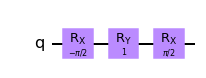

In [3]:
theta = 1
q    = QuantumRegister(1, 'q')
circ = QuantumCircuit(q)
circ.p(theta, q[0])
print_unitary(circ)

q    = QuantumRegister(1, 'q')
circ = QuantumCircuit(q)
circ.rx(-pi / 2, q[0])
circ.ry(theta, q[0])
circ.rx(+pi / 2, q[0])
print_unitary(circ)

circ.draw(output = 'mpl')

## ii. Realizing Y rotation gate using X rotation gate and H-gate.

[[ 0.878+0.j -0.479+0.j]
 [ 0.479+0.j  0.878+0.j]]
[[ 0.878+0.j -0.479+0.j]
 [ 0.479-0.j  0.878-0.j]]


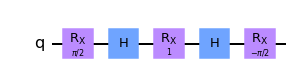

In [4]:
theta = 1
q    = QuantumRegister(1, 'q')
circ = QuantumCircuit(q)
circ.ry(theta, q[0])
print_unitary(circ)

q    = QuantumRegister(1, 'q')
circ = QuantumCircuit(q)
circ.rx(+pi / 2, q[0])
circ.h(q[0])
circ.rx(theta, q[0])
circ.h(q[0])
circ.rx(-pi / 2, q[0])
print_unitary(circ)

circ.draw(output = 'mpl')

## iii. Realizing X rotation gate using Z rotation gate and $X_{\pi/2}$ gate.

[[0.878+0.j    0.   -0.479j]
 [0.   -0.479j 0.878+0.j   ]]
[[ 0.878+0.j     0.   -0.479j]
 [-0.   -0.479j  0.878+0.j   ]]


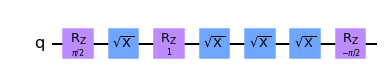

In [7]:
theta = 1
q    = QuantumRegister(1, 'q')
circ = QuantumCircuit(q)
circ.rx(theta, q[0])
print_unitary(circ)

q    = QuantumRegister(1, 'q')
circ = QuantumCircuit(q)
circ.rz(pi / 2, q[0])
circ.sx(q[0])
circ.rz(theta, q[0])
circ.sx(q[0])
circ.sx(q[0])
circ.sx(q[0])
circ.rz(-pi / 2, q[0])
print_unitary(circ)

circ.draw(output = 'mpl')

## iv. Realizing X-gate using Z rotation gate and $X_{\pi/2}$ gate.

[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]
[[-0.-0.j  0.-1.j]
 [-0.-1.j -0.+0.j]]


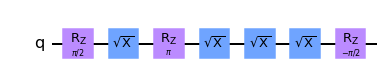

In [8]:
theta = 1
q    = QuantumRegister(1, 'q')
circ = QuantumCircuit(q)
circ.x(q[0])
print_unitary(circ)

q    = QuantumRegister(1, 'q')
circ = QuantumCircuit(q)
circ.rz(pi / 2, q[0])
circ.sx(q[0])
circ.rz(pi, q[0])
circ.sx(q[0])
circ.sx(q[0])
circ.sx(q[0])
circ.rz(-pi / 2, q[0])
print_unitary(circ)

circ.draw(output = 'mpl')

# B. Bell state
## i. Please show the circuits and the results of the other three Bell states.
## ii. Please write the CNOT gate in the Bell state basis.
# C. IBMQ simulator (Aer)
## i. Please use simulator in Aer to show the results of the other three Bell states.
# D. IBMQ real device
## i. Please use any real quantum device to show the results of any one Bell state.

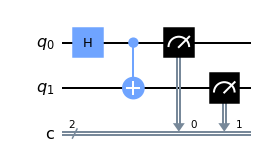

In [2]:
q    = QuantumRegister(2, 'q')
c    = ClassicalRegister(2, 'c')
circ = QuantumCircuit(q, c)

circ.h(q[0])
circ.cx(q[0], q[1])

circ.measure(q[0], c[0])
circ.measure(q[1], c[1])

circ.draw(output = 'mpl')

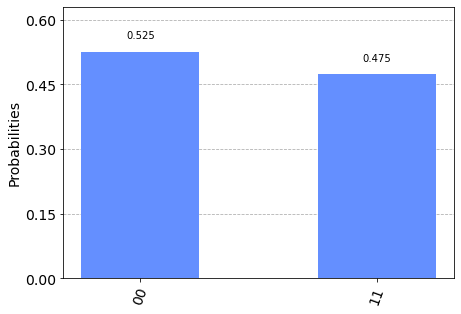

In [3]:
job    = execute(circ, simulator, shot = 1000)
result = job.result()
counts = result.get_counts(circ)
plot_histogram(counts)

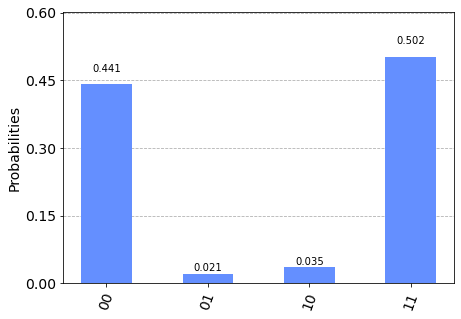

In [4]:
job    = execute(circ, provider.get_backend('ibmq_santiago'))
result = job.result()
counts = result.get_counts(circ)
plot_histogram(counts)

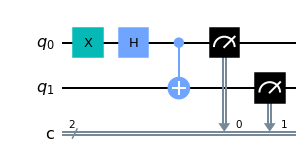

In [5]:
q    = QuantumRegister(2, 'q')
c    = ClassicalRegister(2, 'c')
circ = QuantumCircuit(q, c)

circ.x(q[0])
circ.h(q[0])
circ.cx(q[0], q[1])

circ.measure(q[0], c[0])
circ.measure(q[1], c[1])

circ.draw(output = 'mpl')

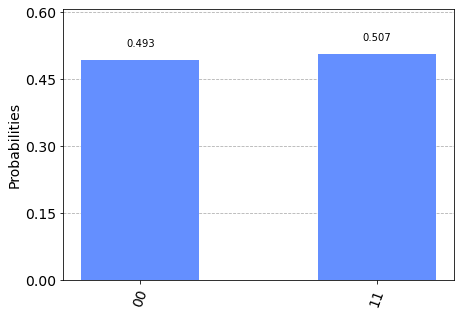

In [6]:
job    = execute(circ, simulator, shot = 1000)
result = job.result()
counts = result.get_counts(circ)
plot_histogram(counts)

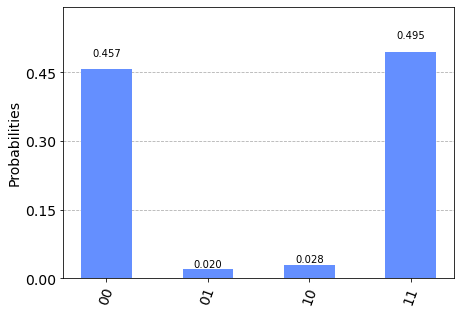

In [7]:
job    = execute(circ, provider.get_backend('ibmq_santiago'))
result = job.result()
counts = result.get_counts(circ)
plot_histogram(counts)

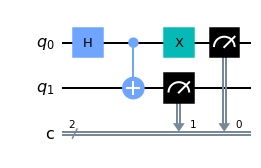

In [8]:
q    = QuantumRegister(2, 'q')
c    = ClassicalRegister(2, 'c')
circ = QuantumCircuit(q, c)

circ.h(q[0])
circ.cx(q[0], q[1])
circ.x(q[0])

circ.measure(q[0], c[0])
circ.measure(q[1], c[1])

circ.draw(output = 'mpl')

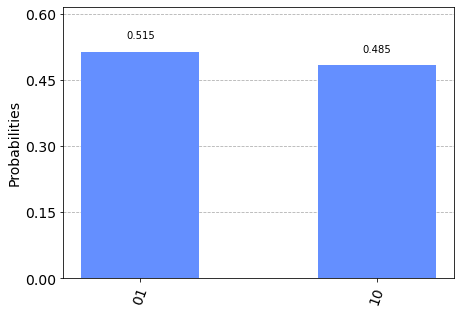

In [9]:
job    = execute(circ, simulator, shot = 1000)
result = job.result()
counts = result.get_counts(circ)
plot_histogram(counts)

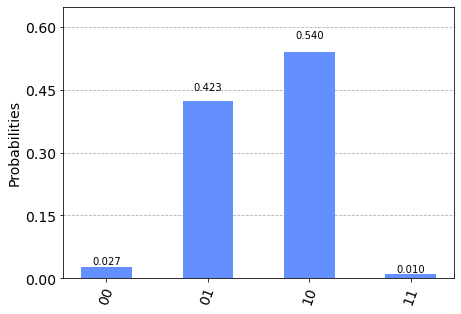

In [10]:
job    = execute(circ, provider.get_backend('ibmq_santiago'))
result = job.result()
counts = result.get_counts(circ)
plot_histogram(counts)

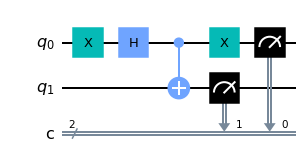

In [11]:
q    = QuantumRegister(2, 'q')
c    = ClassicalRegister(2, 'c')
circ = QuantumCircuit(q, c)

circ.x(q[0])
circ.h(q[0])
circ.cx(q[0], q[1])
circ.x(q[0])

circ.measure(q[0], c[0])
circ.measure(q[1], c[1])

circ.draw(output = 'mpl')

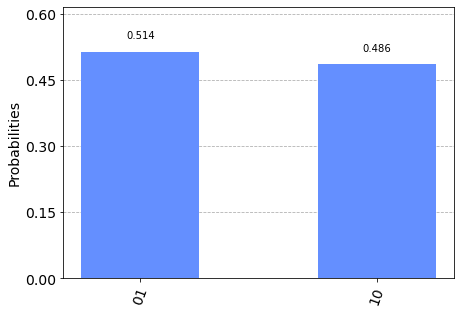

In [12]:
job    = execute(circ, simulator, shot = 1000)
result = job.result()
counts = result.get_counts(circ)
plot_histogram(counts)

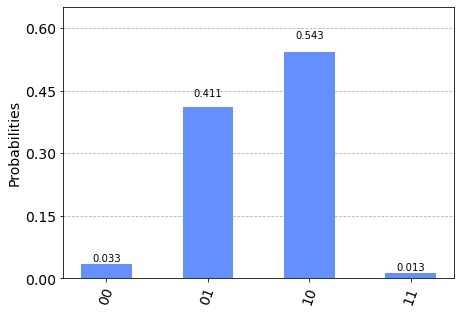

In [13]:
job    = execute(circ, provider.get_backend('ibmq_santiago'))
result = job.result()
counts = result.get_counts(circ)
plot_histogram(counts)